# Práctica Transfer Learning para clasificación de imágenes

En esta práctica, explorarás el concepto de Transfer Learning utilizando el
dataset CIFAR-10. Implementarás modelos con tres arquitecturas diferentes
preentrenadas, comparando su rendimiento, con el objetivo de aprender a
aprovechar modelos preentrenados para resolver problemas de clasificación.

## Descripción del dataset a utilizar

El dataset CIFAR-10 contiene 60,000 imágenes de 32x32 píxeles distribuidas en
10 clases (por ejemplo, aviones, automóviles, pájaros, gatos, etc.). Este dataset
es adecuado para tareas de clasificación de imágenes y es ampliamente utilizado
en la investigación de visión por computadora.

## Parte 1: Preparación
1. Carga del dataset: Utiliza la función load_data() para cargar el dataset
CIFAR-10 (la función está en tensorflow.keras.datasets.cifar10).<br><br>
2. Preprocesamiento de Datos: normaliza las imágenes (escalar los
valores de píxeles entre 0 y 1) y convierte las etiquetas a formato one-hot.

In [23]:
# Genearl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Tensorflow y Keras
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import preprocess_input

In [24]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.cifar10.load_data()

In [25]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [26]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

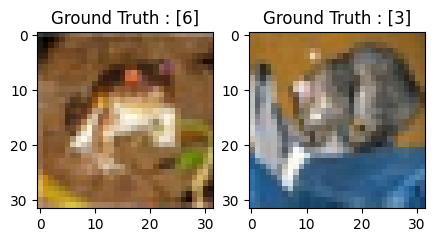

In [27]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [28]:
# Convertir a float32 y normalizar con `preprocess_input` de VGG16
train_X = preprocess_input(train_X.astype('float32'))
test_X = preprocess_input(test_X.astype('float32'))

In [29]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y, num_classes=10)
test_Y_one_hot = to_categorical(test_Y, num_classes=10)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: [6]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(train_X, train_Y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [31]:
# 🔹 3. Parámetros
IMG_SIZE = (32, 32, 3)  # CIFAR-10 tiene imágenes de 32x32
BATCH_SIZE = 32
EPOCHS = 20

# 🔹 4. Construcción del Modelo con VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=IMG_SIZE)

# Congelar capas convolucionales
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas personalizadas
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)  # 10 clases para CIFAR-10

# Crear modelo final
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [ ]:
# 🔹 5. Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

In [ ]:
# 🔹 6. Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🔹 Precisión en test: {test_acc:.4f}")



In [ ]:
# 🔹 7. Graficar pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

